In [1]:
# Q2. How are the emotional tones of top-streamed and most-viewed songs distributed?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Data Loading and Cleaning
filepath = '../data/Spotify_Youtube.csv'
data = pd.read_csv(filepath)
data = data.drop(columns=['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Description'])
data.info()
custom_palette = sns.color_palette(["#386641", "#BC4749", "#A7C957", "#F2E8CF", "#6A994E"])
sns.set_palette(custom_palette)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Title             20248 non-null  object 
 16  Channel           20248 non-null  object

In [3]:
df = data.drop(columns=["Album", "Album_type", "Key", "Loudness", "Speechiness", "Acousticness", "Instrumentalness",  
                        "Liveness", "Tempo", "Duration_ms", "Channel", "Comments", "Licensed", "official_video", "Likes"])
df = df.dropna(how="any")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19691 entries, 0 to 20717
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Artist        19691 non-null  object 
 1   Track         19691 non-null  object 
 2   Danceability  19691 non-null  float64
 3   Energy        19691 non-null  float64
 4   Valence       19691 non-null  float64
 5   Title         19691 non-null  object 
 6   Views         19691 non-null  float64
 7   Stream        19691 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.4+ MB


In [4]:
# Define popular songs using quantiles
popular_streams = df["Stream"].quantile(0.85)
popular_views = df["Views"].quantile(0.85)

df2 = df.loc[(df["Stream"] >= popular_streams) & (df["Views"] >= popular_views)]
#df2 = df.loc[df["Views"] >= popular_views]
df2.head(10)

,Artist,Track,Danceability,Energy,Valence,Title,Views,Stream
0,Gorillaz,Feel Good Inc.,0.818,0.705,0.772,Gorillaz - Feel Good Inc. (Official Video),6.935552e+08,1.040235e+09
3,Gorillaz,On Melancholy Hill,0.689,0.739,0.578,Gorillaz - On Melancholy Hill (Official Video),2.117550e+08,4.346636e+08
4,Gorillaz,Clint Eastwood,0.663,0.694,0.525,Gorillaz - Clint Eastwood (Official Video),6.184810e+08,6.172597e+08
5,Gorillaz,DARE,0.760,0.891,0.966,Gorillaz - DARE (Official Video),2.590212e+08,3.238503e+08
10,Red Hot Chili Peppers,Californication,0.592,0.767,0.328,Red Hot Chili Peppers - Californication (Offic...,1.018811e+09,1.055738e+09
11,Red Hot Chili Peppers,Under the Bridge,0.559,0.345,0.458,Red Hot Chili Peppers - Under The Bridge [Offi...,2.466877e+08,1.061751e+09
12,Red Hot Chili Peppers,Can't Stop,0.618,0.938,0.875,Red Hot Chili Peppers - Can't Stop [Official M...,3.366358e+08,8.664650e+08
13,Red Hot Chili Peppers,Scar Tissue,0.595,0.717,0.547,Red Hot Chili Peppers - Scar Tissue [Official ...,4.351215e+08,6.138387e+08
14,Red Hot Chili Peppers,Otherside,0.458,0.795,0.513,Red Hot Chili Peppers - Otherside [Official Mu...,6.735287e+08,7.327745e+08
15,Red Hot Chili Peppers,Snow (Hey Oh),0.427,0.900,0.599,Red Hot Chili Peppers - Snow (Hey Oh) (Officia...,3.208712e+08,8.607223e+08


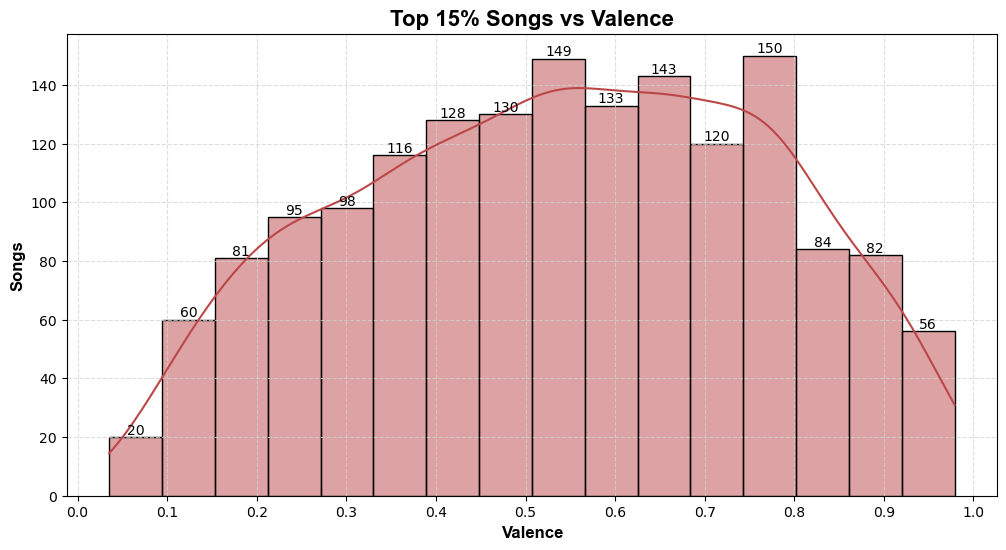

In [5]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.histplot(data=df2, x="Valence", kde=True, color="#BC4749")

# Add Labels/Title
plt.xlabel("Valence", fontfamily="Arial", fontweight="bold", fontsize=12)
plt.ylabel("Songs", fontfamily="Arial", fontweight="bold", fontsize=12)
plt.title("Top 15% Songs vs Valence", fontweight="bold", fontsize=16, fontfamily="Arial")

# Loop through the patches (bars) and add text labels
for p in plt.gca().patches:
    # Get the height of each bar (count)
    height = p.get_height()
    
    # Get the x-position of the bar (center of the bar)
    x_position = p.get_x() + p.get_width() / 2
    
    # Add the count as a label on top of the bar
    plt.text(x_position, height, str(int(height)), ha='center', va='bottom', fontsize=10)

# Change the interval from 0.2 to 0.1
plt.xticks([x * 0.1 for x in range(11)])

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

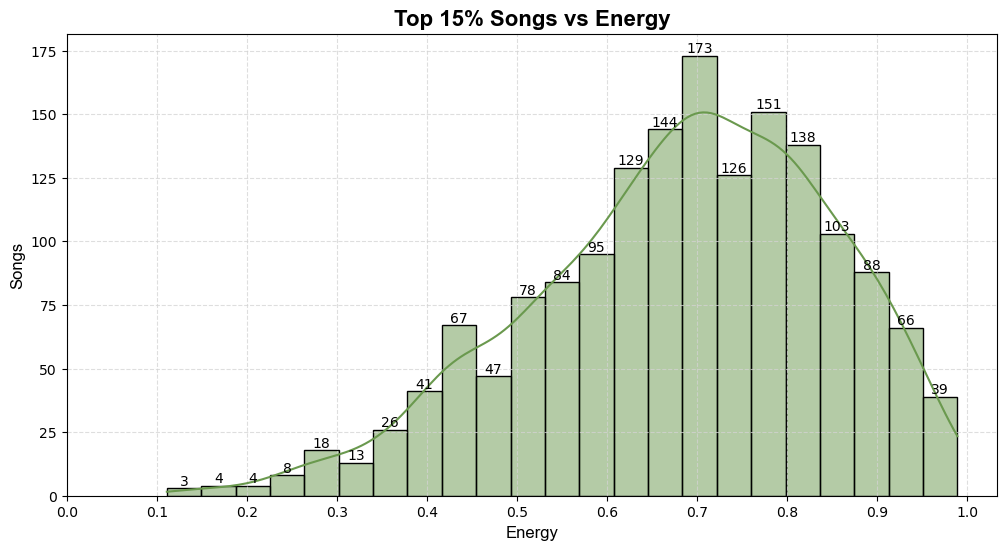

In [6]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.histplot(data=df2, x="Energy", kde=True, color="#6A994E")

# Add Labels/Title
plt.xlabel("Energy", fontfamily="Arial", fontsize=12)
plt.ylabel("Songs", fontfamily="Arial", fontsize=12)
plt.title("Top 15% Songs vs Energy", fontweight="bold", fontsize=16, fontfamily="Arial")

# Loop through the patches (bars) and add text labels
for p in plt.gca().patches:
    # Get the height of each bar (count)
    height = p.get_height()
    
    # Get the x-position of the bar (center of the bar)
    x_position = p.get_x() + p.get_width() / 2
    
    # Add the count as a label on top of the bar
    plt.text(x_position, height, str(int(height)), ha='center', va='bottom', fontsize=10)

# Change the interval from 0.2 to 0.1
plt.xticks([x * 0.1 for x in range(11)])

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

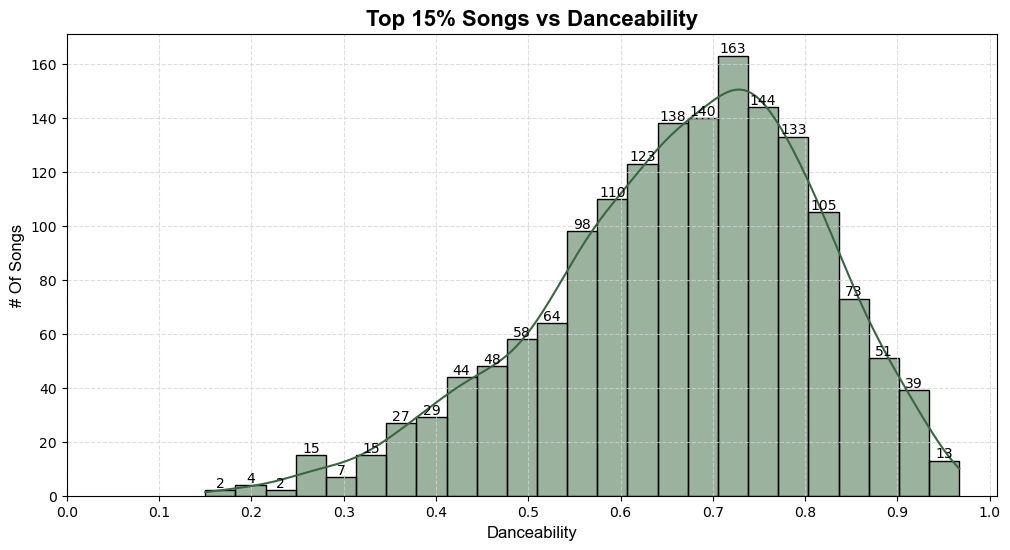

In [7]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.histplot(data=df2, x="Danceability", kde=True, color="#386641")

# Add Labels/Title
plt.xlabel("Danceability", fontfamily="Arial", fontsize=12)
plt.ylabel("# Of Songs", fontfamily="Arial", fontsize=12)
plt.title("Top 15% Songs vs Danceability", fontweight="bold", fontsize=16, fontfamily="Arial")

# Loop through the patches (bars) and add text labels
for p in plt.gca().patches:
    # Get the height of each bar (count)
    height = p.get_height()
    
    # Get the x-position of the bar (center of the bar)
    x_position = p.get_x() + p.get_width() / 2
    
    # Add the count as a label on top of the bar
    plt.text(x_position, height, str(int(height)), ha='center', va='bottom', fontsize=10)

# Change the interval from 0.2 to 0.1
plt.xticks([x * 0.1 for x in range(11)])

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [8]:
correlation = df2[["Valence", "Energy", "Danceability"]].corr()
correlation

,Valence,Energy,Danceability
Valence,1.000000,0.343067,0.402326
Energy,0.343067,1.000000,-0.002059
Danceability,0.402326,-0.002059,1.000000


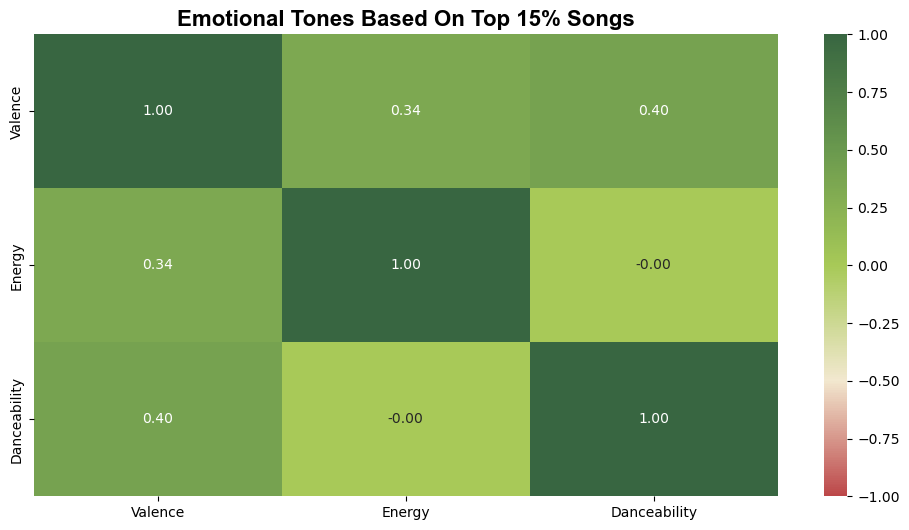

In [9]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

#Define your custom color palette
colors = ["#BC4749", "#F2E8CF", "#A7C957", "#6A994E", "#386641"]
custom_palette = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Create a basic plot with the color bar indicator
sns.heatmap(correlation, annot=True, cmap=custom_palette, fmt='.2f', vmin=-1, vmax=1)

# Customization
plt.title("Emotional Tones Based On Top 15% Songs", fontweight="bold", fontsize=16, fontfamily="Arial",)

# Show/Save the Graph
plt.show()